In [ ]:
# !pip install mpld3

In [1]:
# 출처
### https://towardsdatascience.com/infectious-disease-modelling-part-i-understanding-sir-28d60e29fdfc

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

## `SIR 모델`

<br>

`SIR 모델`은 전염병의 전파 과정을 가정하는 수학적 모델이다.

SIR 모델의 `S`, `I`, `R`은 다음과 같다.

`S (Susceptible)` == `미감염자의 수`. 전염병에 노출되었을 때 감염될 가능성이 있는 사람들의 수

`I (Infected)` == `감염자의 수`. 전염병에 감염된 사람들의 수

`R (Recovered)` == `완치자의 수`. 감염되었지만 회복되거나 사망한 사람들의 수

`N (Total Population) = S + I + R`

SIR 모델은 전체 인구를 S + I + R = N 으로 나누어 모델링합니다. 시간이 지남에 따라 미감염자 수 (S)는 감염자들과의 접촉이 일어날 때 감염될 가능성이 있으므로 감염자 수 (I)에 비례하여 감소합니다. 감염자 수 (I)는 시간이 지남에 따라 감염자끼리의 접촉이 일어나 감염자 수(I)가 증가합니다. 완치자의 수(R)는 감염자 수(I)에 비례하여 증가합니다.

SIR 모델에서는 시간에 따른 S, I, R의 변화를 각각의 수학적 방정식으로 모델링하고, 이를 토대로 전염병의 전파 과정을 예측하고 대처방안을 모색할 수 있습니다.

## 1. SIR 모델의 미분 방정식

`SIR 모델의 미분 방정식`은 다음과 같이 나타낼 수 있습니다.

<br>

$$\large dS/dt = -\beta \times S \times I / N$$
$$\therefore 미감염자 수S는 감염확률 \beta와 감염자 수 I에 비례해 감소한다$$<br>
$$\large dI/dt = \beta \times S \times I / N - \gamma * I$$
$$\therefore 감염자 수I는 회복확률 \gamma에 비례해 감소한다$$<br>
$$\large dR/dt = \gamma \times I$$

such that

`dS/dt = 시간에 따른 미감염자 수의 변화율`<br>
`dI/dt = 시간에 따른 감염자 수의 변화율`<br>
`dR/dt = 시간에 따른 완치자 수의 변화율`<br>
$\beta$ `= beta = 감염 확률` <br> 
$\gamma$ `= gamma = 회복 확률` <br>
`N = 총 인구수`

In [2]:
def deriv(y, t, N, beta, gamma): #t : 현재 시간
    S, I, R = y # y : S, I, R의 초기값을 담은 배열
    dSdt = -beta * S * I / N # S의 변화율
    dIdt = beta * S * I / N - gamma * I #I의 변화율
    dRdt = gamma * I #R의 변화율
    return dSdt, dIdt, dRdt

## 2. 모델 파라미터 가정

`N = 10,000 ==> 인원 10,000명의 모집단` <br>
`beta = 2.0 ==> 감염자는 하루에 2명에게 병을 감염시킨다` <br>
`D = 4.0 ==> 감염은 4일간 지속한다` <br>
`gamma = 1.0 / D ==> 회복률 : 4일간 점진적으로 치유`

`S0, I0, R0 ==> 처음 모델을 시작할 때의 조건`

In [3]:
N = 100000
beta = 2.0
D = 4.0
gamma = 1.0 / D

S0, I0, R0 = 99994, 5, 1  # initial conditions: one infected, rest susceptible

## 3. Train Model

`t = 발병일 0부터 50일까지의 경과 확인`

`scipy.integrate.odeint` 함수는 초기값 `y0`과 미분 방정식 `deriv`을 입력받아 미분 방정식의 수치해를 계산하여 시간에 따른 변수의 변화를 예측하는 함수이다. 이 때, 미분 방정식은 1차 미분 방정식이어야 한다.

odeint 함수는 먼저 초기값과 시간 범위를 설정하고 초기값을 이용하여 미분 방정식을 계산한다. 그 다음 계산된 미분 방정식을 이용하여 다음 시점의 변수 값을 추정한다. 이를 다시 초기값으로 사용하여 미분 방정식을 계산하고, 다음 시점의 변수 값을 추정하는 과정을 반복한다.

In [4]:
t = np.linspace(0, 49, 50)
y0 = S0, I0, R0

ret = odeint(deriv, y0, t, args=(N, beta, gamma)) # SIR 모델 시뮬레이션
S, I, R = ret.T # 각 변수의 값을 추출하여 배열로 반환

In [5]:
S_ = []

for _ in S:
    S_.append(round(_, 2))
    
print(S_)

[99994.0, 99966.84, 99810.86, 98923.27, 94127.02, 73962.18, 35004.22, 10797.41, 3356.14, 1256.69, 572.31, 307.83, 189.33, 129.47, 96.22, 76.33, 63.72, 55.35, 49.59, 45.52, 42.58, 40.42, 38.82, 37.61, 36.69, 36.0, 35.46, 35.05, 34.73, 34.49, 34.3, 34.15, 34.04, 33.95, 33.88, 33.83, 33.78, 33.75, 33.73, 33.71, 33.69, 33.68, 33.67, 33.66, 33.66, 33.65, 33.65, 33.65, 33.64, 33.64]


In [6]:
I_ = []

for _ in I:
    I_.append(round(_, 2))
    
print(I_)

[5.0, 28.76, 165.23, 941.16, 5116.17, 22267.37, 51874.26, 61379.04, 54213.88, 44034.42, 34886.94, 27399.84, 21442.29, 16751.55, 13075.21, 10200.4, 7955.15, 6202.82, 4835.82, 3769.71, 2938.44, 2290.36, 1785.14, 1391.33, 1084.38, 845.13, 658.66, 513.32, 400.06, 311.78, 242.98, 189.36, 147.58, 115.01, 89.63, 69.85, 54.44, 42.42, 33.06, 25.77, 20.08, 15.65, 12.2, 9.5, 7.41, 5.77, 4.5, 3.51, 2.73, 2.13]


In [7]:
## 그래프로 나타내기

def plotsir(t, S, I, R):
    f, ax = plt.subplots(1, 1, figsize=(12,6))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

    ax.set_xlabel('Time (days)')

    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
        
    plt.show();

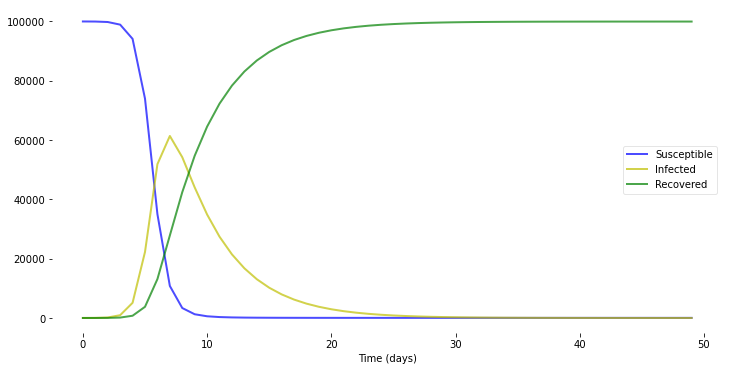

In [8]:
plotsir(t, S, I, R)